<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [143]:
import matplotlib.pyplot as plt

% matplotlib inline

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [145]:
# Exploratory data analysis.
# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = y
print("total nulls:\n", df.isnull().sum())
print("\n")
print("index:", df.index)
print("\n")
print("data types:\n", df.dtypes)
print("\n")
print("shape:", df.shape)
print("\n")
print(df.describe())

unique_vals = pd.DataFrame(columns=["Number of Unique Values"], index=df.columns)
for col in df.columns:
    unique_vals.loc[col,"Number of Unique Values"]=len(df[col].value_counts())
unique_vals

total nulls:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


index: RangeIndex(start=0, stop=506, step=1)


data types:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


shape: (506, 14)


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.

,Number of Unique Values
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

          LSTAT        RM       AGE      MEDV
LSTAT  1.000000 -0.613808  0.602339 -0.737663
RM    -0.613808  1.000000 -0.240265  0.695360
AGE    0.602339 -0.240265  1.000000 -0.376955
MEDV  -0.737663  0.695360 -0.376955  1.000000


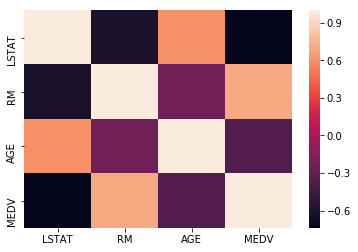

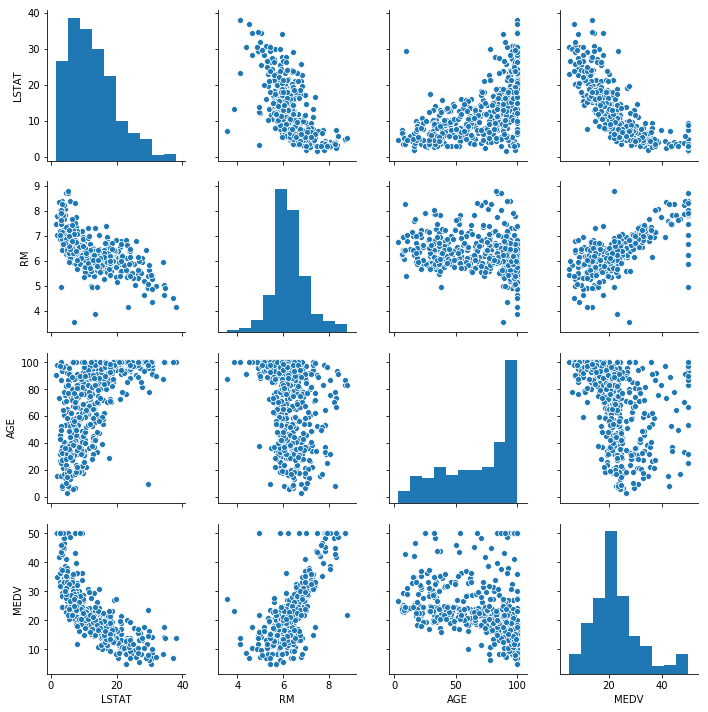

In [4]:
#I would like to examine LSTAT, RM, AGE
#Create a new dataframe and populate the columns with the selected boston data
mydf = pd.DataFrame(columns=["LSTAT", "RM", "AGE","MEDV"])
for col in mydf.columns:
    mydf[col] = df[col]

print(mydf.corr())
sns.heatmap(mydf.corr())
sns.pairplot(mydf)

It seems that LSTAT (% lower status of the population) is very negatively correlated with our target, MEDV (median value of the homes). Next, the number of rooms is positively correlated with the target, and age has a relatively low correlation with MEDV (-0.4)

In [146]:
from sklearn.linear_model import LinearRegression
#Creating a linear regression model for the selected data
linreg = LinearRegression()

X = mydf.drop(columns = "MEDV")
y = mydf.MEDV

linreg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R squared:  0.6390341221591789
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          1.20e-110
Time:                        15:53:42   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1753

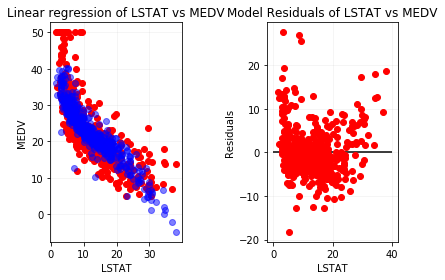

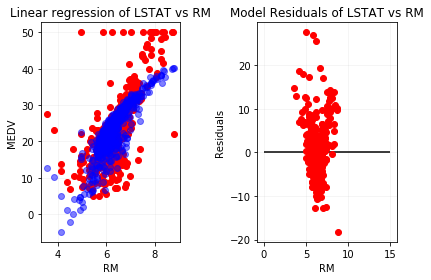

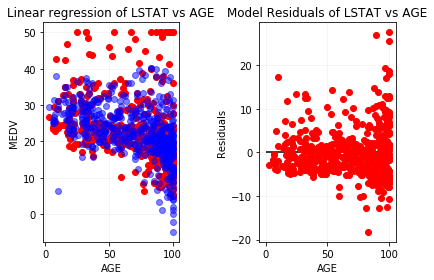

In [163]:
from sklearn.metrics import r2_score
import statsmodels.api as sm

#plotting the linear regression model
#print the r squared score and summary statistics for the model
y_pred = linreg.predict(X)
r2_wholedata = r2_score(y, y_pred)
print("R squared: ", r2_wholedata)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

#Create plots of the LR model and residuals for each feature
plt.subplot(1, 2, 1)
plt.title("Linear regression of LSTAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.plot(X.LSTAT, y, 'ro')
plt.plot(X.LSTAT, y_pred, 'bo', alpha = 0.5)
plt.grid(alpha=0.15)

plt.subplot(1, 2, 2)
plt.title("Model Residuals of LSTAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("Residuals")
plt.plot(X.LSTAT, y-y_pred, 'ro')
plt.hlines(y=0, xmin=0, xmax=40, colors='k', linestyles='solid', label='')
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.title("Linear regression of LSTAT vs RM")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(X.RM, y, 'ro')
plt.plot(X.RM, y_pred, 'bo', alpha = 0.5)
plt.grid(alpha=0.15)

plt.subplot(1, 2, 2)
plt.title("Model Residuals of LSTAT vs RM")
plt.xlabel("RM")
plt.ylabel("Residuals")
plt.plot(X.RM, y-y_pred, 'ro')
plt.hlines(y=0, xmin=0, xmax=15, colors='k', linestyles='solid', label='')
plt.grid(alpha=0.15)
plt.subplots_adjust()
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.title("Linear regression of LSTAT vs AGE")
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.plot(X.AGE, y, 'ro')
plt.plot(X.AGE, y_pred, 'bo', alpha = 0.5)
plt.grid(alpha=0.15)

plt.subplot(1, 2, 2)
plt.title("Model Residuals of LSTAT vs AGE")
plt.xlabel("AGE")
plt.ylabel("Residuals")
plt.plot(X.AGE, y-y_pred, 'ro')
plt.hlines(y=0, xmin=0, xmax=100, colors='k', linestyles='solid', label='')
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()



### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [164]:
from sklearn.model_selection import train_test_split

X = mydf[['LSTAT','RM', 'AGE']]
y = mydf.MEDV
#Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.3)
#Train linear regression model on the train data
linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R squared:  0.5744401718017063
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.167e+30
Date:                Thu, 13 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:03:34   Log-Likelihood:                 4501.6
No. Observations:                 152   AIC:                            -8995.
Df Residuals:                     148   BIC:                            -8983.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4427

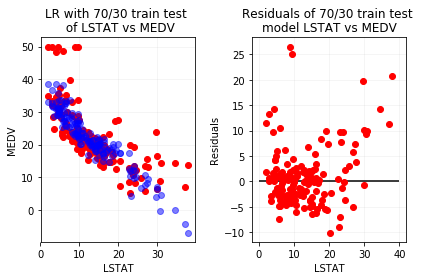

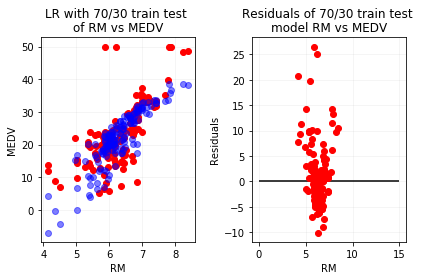

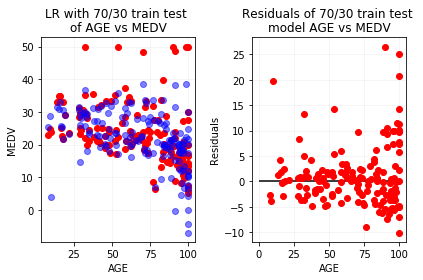

In [169]:
#Print the r squared and summary stats for this model
y_pred = linreg2.predict(X_test)
r2_train30 = r2_score(y_test, y_pred)
print("R squared: ", r2_train30)

X2 = sm.add_constant(X_test)
est = sm.OLS(y_pred, X2)
est2 = est.fit()
print(est2.summary())

#Create plots of this model and residuals for each feature
plt.subplot(1, 2, 1)
plt.title("LR with 70/30 train test \n of LSTAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.plot(X_test.LSTAT, y_test, 'ro')
plt.plot(X_test.LSTAT, y_pred, 'bo', alpha = 0.5)
plt.grid(alpha=0.15)

plt.subplot(1, 2, 2)
plt.title("Residuals of 70/30 train test \nmodel LSTAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("Residuals")
plt.plot(X_test.LSTAT, y_test-y_pred, 'ro')
plt.hlines(y=0, xmin=0, xmax=40, colors='k', linestyles='solid', label='')
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.title("LR with 70/30 train test \nof RM vs MEDV")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(X_test.RM, y_test, 'ro')
plt.grid(alpha=0.15)
plt.plot(X_test.RM, y_pred, 'bo', alpha = 0.5)

plt.subplot(1, 2, 2)
plt.title("Residuals of 70/30 train test \nmodel RM vs MEDV")
plt.xlabel("RM")
plt.ylabel("Residuals")
plt.plot(X_test.RM, y_test-y_pred, 'ro')
plt.hlines(y=0, xmin=0, xmax=15, colors='k', linestyles='solid', label='')
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.title("LR with 70/30 train test \nof AGE vs MEDV")
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.plot(X_test.AGE, y_test, 'ro')
plt.grid(alpha=0.15)
plt.plot(X_test.AGE, y_pred, 'bo', alpha = 0.5)

plt.subplot(1, 2, 2)
plt.title("Residuals of 70/30 train test \nmodel AGE vs MEDV")
plt.xlabel("AGE")
plt.ylabel("Residuals")
plt.plot(X_test.AGE, y_test-y_pred, 'ro')
plt.hlines(y=0, xmin=0, xmax=100, colors='k', linestyles='solid', label='')
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.1)

linreg3 = LinearRegression()
linreg3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R squared:  0.591229019070004
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.472e+30
Date:                Thu, 13 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:05:30   Log-Likelihood:                 4514.1
No. Observations:                 152   AIC:                            -9020.
Df Residuals:                     148   BIC:                            -9008.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2917 

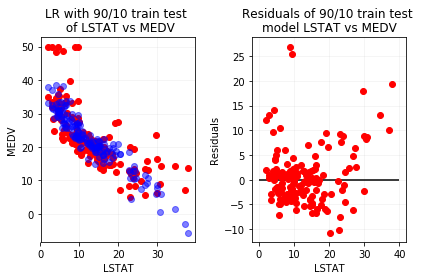

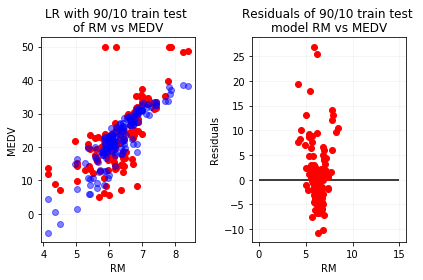

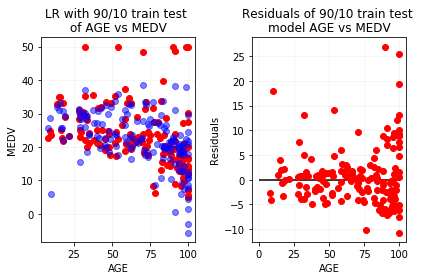

In [171]:
y_pred = linreg3.predict(X_test)
r2_train10 = r2_score(y_test, y_pred)
#Print the r squared and summary stats for this model
print("R squared: ", r2_train10) 

X2 = sm.add_constant(X_test)
est = sm.OLS(y_pred, X2)
est2 = est.fit()
print(est2.summary())

#Create plots of this model and residuals for each feature
plt.subplot(1, 2, 1)
plt.title("LR with 90/10 train test \n of LSTAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.plot(X_test.LSTAT, y_test, 'ro')
plt.plot(X_test.LSTAT, y_pred, 'bo', alpha = 0.5)
plt.grid(alpha=0.15)

plt.subplot(1, 2, 2)
plt.title("Residuals of 90/10 train test \nmodel LSTAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("Residuals")
plt.plot(X_test.LSTAT, y_test-y_pred, 'ro')
plt.hlines(y=0, xmin=0, xmax=40, colors='k', linestyles='solid', label='')
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.title("LR with 90/10 train test \nof RM vs MEDV")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(X_test.RM, y_test, 'ro')
plt.grid(alpha=0.15)
plt.plot(X_test.RM, y_pred, 'bo', alpha = 0.5)

plt.subplot(1, 2, 2)
plt.title("Residuals of 90/10 train test \nmodel RM vs MEDV")
plt.xlabel("RM")
plt.ylabel("Residuals")
plt.plot(X_test.RM, y_test-y_pred, 'ro')
plt.hlines(y=0, xmin=0, xmax=15, colors='k', linestyles='solid', label='')
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.title("LR with 90/10 train test \nof AGE vs MEDV")
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.plot(X_test.AGE, y_test, 'ro')
plt.grid(alpha=0.15)
plt.plot(X_test.AGE, y_pred, 'bo', alpha = 0.5)

plt.subplot(1, 2, 2)
plt.title("Residuals of 90/10 train test \nmodel AGE vs MEDV")
plt.xlabel("AGE")
plt.ylabel("Residuals")
plt.plot(X_test.AGE, y_test-y_pred, 'ro')
plt.hlines(y=0, xmin=0, xmax=100, colors='k', linestyles='solid', label='')
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [12]:
from sklearn import model_selection
from sklearn import metrics

In [173]:
#Create a function that performs k-fold cross validation so we can loop it for different numbers of folds
def Kfoldsval(splits):
    kf = model_selection.KFold(n_splits=splits, shuffle=True)
    mse_values = []
    scores = []
    n = 0

    for train_index, test_index in kf.split(X, y):
        lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])

        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
        scores.append(lr.score(X, y))

        n += 1
    #Save the MSE and rsquared scores in lists to display as a chart
    mse_values.append(np.mean(mse_values))
    scores.append(np.mean(scores))
    headers = []
    for i in range(splits):
        headers.append("Model {}".format(i+1))
    headers.append("Average")
    data_tuples = list(zip(mse_values, scores))
    df = pd.DataFrame(data_tuples, columns=["MSE","R2"], index=headers)
    
    print("\nNumber of Folds: {}".format(splits))
    print(df)

#loop the kfolds validation function for folds = 5 - 10
for fold in range(5,11):
    Kfoldsval(fold)



Number of Folds: 5
               MSE        R2
Model 1  48.497177  0.633758
Model 2  24.342098  0.638433
Model 3  24.663098  0.638448
Model 4  24.819301  0.636559
Model 5  37.674005  0.637488
Average  31.999136  0.636937

Number of Folds: 6
               MSE        R2
Model 1  28.513351  0.638386
Model 2  26.647494  0.638433
Model 3  38.850765  0.637735
Model 4  39.766403  0.637098
Model 5  31.621436  0.638633
Model 6  23.490523  0.637475
Average  31.481662  0.637960

Number of Folds: 7
               MSE        R2
Model 1  45.531496  0.638406
Model 2  33.791180  0.638194
Model 3  20.581868  0.638735
Model 4  32.271723  0.635772
Model 5  41.155244  0.638856
Model 6  26.836608  0.638351
Model 7  19.291705  0.638965
Average  31.351403  0.638183

Number of Folds: 8
               MSE        R2
Model 1  34.918923  0.638645
Model 2  32.706658  0.637132
Model 3  46.388670  0.638422
Model 4  22.507614  0.638706
Model 5  24.759324  0.638742
Model 6  41.426763  0.638103
Model 7  21.627434  0

It seems that as the number of folds increases, the average R squared scores increase by a very small amount. The fluctuations in MSE are also very minor between different numbers of folds. 

# KNN Practice

In [174]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [175]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [176]:
# Create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [177]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
speciesdict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris["species_num"]=iris.species.map(speciesdict)

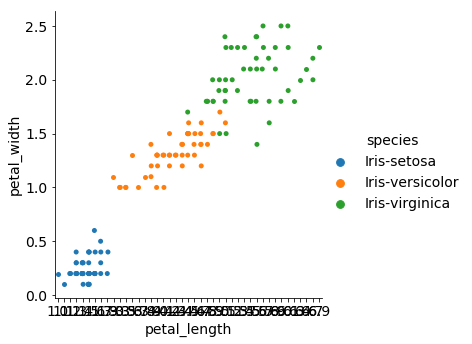

In [178]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
sns.catplot(x='petal_length', y='petal_width', data=iris, hue="species")

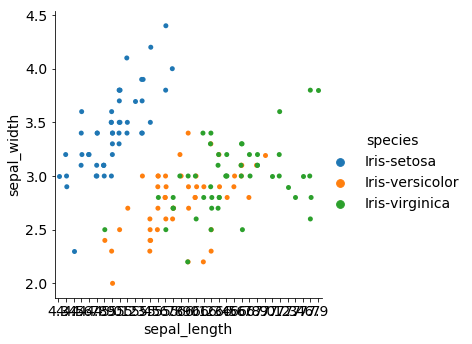

In [179]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
sns.catplot(x='sepal_length', y='sepal_width', data=iris, hue="species")

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [180]:
X = iris.drop(columns=["species", "species_num"])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Create your target vector "y"
This will be the species type.

In [181]:
y = iris['species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.3)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [183]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [186]:
from sklearn import metrics
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred_class)))

Accuracy: 0.9333333333333333


### Create a Model With Five Neighbors. Did it Improve?

In [187]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred_class = knn5.predict(X_test)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred_class)))


Accuracy: 0.9555555555555556


### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [188]:
def knn_modeler(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print("With", k, "neighbors, the model accuracy is", accuracy)

for k in range(1,21):
    knn_modeler(k)
    
    

With 1 neighbors, the model accuracy is 0.9333333333333333
With 2 neighbors, the model accuracy is 0.9333333333333333
With 3 neighbors, the model accuracy is 0.9333333333333333
With 4 neighbors, the model accuracy is 0.9555555555555556
With 5 neighbors, the model accuracy is 0.9555555555555556
With 6 neighbors, the model accuracy is 0.9555555555555556
With 7 neighbors, the model accuracy is 0.9555555555555556
With 8 neighbors, the model accuracy is 0.9777777777777777
With 9 neighbors, the model accuracy is 0.9777777777777777
With 10 neighbors, the model accuracy is 0.9777777777777777
With 11 neighbors, the model accuracy is 0.9777777777777777
With 12 neighbors, the model accuracy is 0.9777777777777777
With 13 neighbors, the model accuracy is 0.9555555555555556
With 14 neighbors, the model accuracy is 0.9777777777777777
With 15 neighbors, the model accuracy is 0.9555555555555556
With 16 neighbors, the model accuracy is 0.9777777777777777
With 17 neighbors, the model accuracy is 0.955555

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

In [ ]:
#Return probability estimates for the test data X_new

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [141]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [142]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          1.59e-321
Time:                        15:10:08   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))